In [2]:
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import trompy as tp

In [3]:
animal="VGP302"
day="031"
date="20221110"


s2p_folder = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\VGP_procd_data_22-12-05\\sub-{}\\ses-{}".format(animal, day)
events_file = "C:\\Users\\mko102\\UiT Office 365\\O365-Pipette 2 - Dokumenter\\People\\Mette\\GitHub\\2P\\Processed\\behav\\sub-{0}\\ses-{1}-{2}\\sub-{0}_ses-{1}_events.csv".format(animal, day, date)


raw_F = np.load(os.path.join(s2p_folder, 'F.npy'))
neu_F = np.load(os.path.join(s2p_folder, 'Fneu.npy'))
iscell = np.load(os.path.join(s2p_folder, 'iscell.npy'))
stats=np.load(os.path.join(s2p_folder, 'stat.npy'), allow_pickle=True)


print(events_file)

C:\Users\mko102\UiT Office 365\O365-Pipette 2 - Dokumenter\People\Mette\GitHub\2P\Processed\behav\sub-VGP302\ses-031-20221110\sub-VGP302_ses-031_events.csv


In [4]:
stats[24]['med']

[53, 151]

In [5]:
neu_F.shape

(171, 11680)

In [6]:
cell_idx = 90

r = raw_F[cell_idx, :]
x = raw_F[cell_idx, :] - neu_F[cell_idx, :]
x7 = raw_F[cell_idx, :] - 0.7 * neu_F[cell_idx, :]
print('len X:',len(x))

#zscore

z = (r - np.mean(r))/np.std(r)

#df/f
df = r-np.mean(r)

#filter
t = np.arange(0,len(x)/10,0.1)
filt = signal.butter(4, 1, 'low', fs=10, output='sos')
filtered = signal.sosfilt(filt, z)

len X: 11680


(500.0, 700.0)

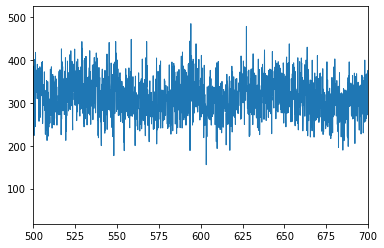

In [7]:
f, ax = plt.subplots()
ax.plot(t, x, linewidth=1)
# ax.plot(t, filtered, linewidth=1)
#ax.set_ylim(16800, 17000)

ax.set_xlim([500, 700])

In [8]:
np.shape(raw_F)

(171, 11680)

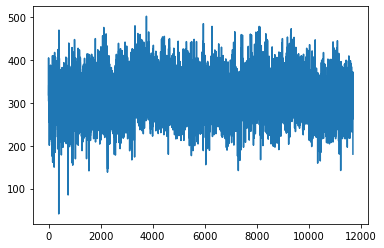

In [9]:
n = neu_F[cell_idx, :]
plt.plot(x)

In [10]:
import pandas as pd

df = pd.read_csv(events_file)

pump_frames = list(df[df['Item1'] == 'pump_on']['Item2.Item2'])

pump_frames=[frame for frame in pump_frames if frame < len(z)-100] #removes event if too close to the end

licks_frames = list (df[df['Item1']== 'Lick']['Item2.Item2'])


In [11]:
df

,Item1,Item2.Item1.Item1,Item2.Item1.Item2.Value.IsInvalid,Item2.Item1.Item2.Value.ElementType,Item2.Item1.Item2.Value.Size.Width,Item2.Item1.Item2.Value.Size.Height,Item2.Item1.Item2.Value.Rows,Item2.Item1.Item2.Value.Cols,Item2.Item1.Item2.Value.Step,Item2.Item1.Item2.Value.Depth,Item2.Item1.Item2.Value.Channels,Item2.Item1.Item2.Value.ElementSize,Item2.Item1.Item2.Value.Data,Item2.Item1.Item2.Value.IsClosed,Item2.Item1.Item2.Timestamp,Item2.Item2
0,Cue_on,True,False,6,10,2,2,10,80,F64,1,8,552372032,False,2022-11-10T15:53:03.2810752+01:00,145
1,Cue_off,True,False,6,10,2,2,10,80,F64,1,8,595609264,False,2022-11-10T15:53:08.2759680+01:00,195
2,pump_on,True,False,6,10,2,2,10,80,F64,1,8,593338288,False,2022-11-10T15:53:08.7822464+01:00,200
3,pump_off,True,False,6,10,2,2,10,80,F64,1,8,596827424,False,2022-11-10T15:53:10.8751232+01:00,221
4,Lick,True,False,6,10,2,2,10,80,F64,1,8,596092896,False,2022-11-10T15:53:27.3907456+01:00,386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,pump_off,True,False,6,10,2,2,10,80,F64,1,8,591903648,False,2022-11-10T16:11:47.2055168+01:00,11379
380,Cue_on,True,False,6,10,2,2,10,80,F64,1,8,593565216,False,2022-11-10T16:12:02.6095488+01:00,11533
381,Cue_off,True,False,6,10,2,2,10,80,F64,1,8,595785984,False,2022-11-10T16:12:07.6085376+01:00,11583
382,pump_on,True,False,6,10,2,2,10,80,F64,1,8,594355456,False,2022-11-10T16:12:08.1089536+01:00,11588


In [12]:
snips = []
for p in pump_frames:
    snips.append(filtered[p-50:p+100]) 

In [14]:
# excluding missed trials 
# List of hit and missed trieals

hit=[]
miss=[]
licks=[]
for p in pump_frames: 
    temp=[]
    for lick in licks_frames: 
        if lick > p and lick < p + 100:
            temp.append(lick)
            
    if len(temp) > 0: 
        hit.append(p) # list of frame number of pump on in trials WITH liskc
    if len(temp) == 0: 
        miss.append(p) # list of frame number of pump on in trials WITHOUT liskc
        
    licks.append(temp) # to get list of licks in each trial 
        
temp_l=[]
for trial in licks: 
    if len(trial) > 0: 
        temp_l.append(trial[:1])     # Makes a list of lists (frame number of first lick in hit trials)
        
#List comprehension to convert list of lists to flat list 
first_lick=[trial for sublist in temp_l for trial in sublist]  



print('hit', hit)
print('miss', miss)
print('lick', first_lick)

print(pump_frames)


hit [539, 806, 1040, 1401, 1705, 2068, 2383, 3288, 3931, 4838, 5396, 6264, 6620, 7555, 7908, 8220]
miss [200, 2642, 2965, 3578, 4273, 4531, 5126, 5734, 5966, 6953, 7199, 8576, 8864, 9165, 9422, 9765, 10124, 10404, 10684, 11030, 11359]
lick [563, 819, 1044, 1459, 1742, 2076, 2392, 3321, 3948, 4852, 5434, 6312, 6682, 7562, 7928, 8295]
[200, 539, 806, 1040, 1401, 1705, 2068, 2383, 2642, 2965, 3288, 3578, 3931, 4273, 4531, 4838, 5126, 5396, 5734, 5966, 6264, 6620, 6953, 7199, 7555, 7908, 8220, 8576, 8864, 9165, 9422, 9765, 10124, 10404, 10684, 11030, 11359]


In [103]:
# # List of first lick in trial 

# licks=[]

# for p in pump_frames: 
#     temp=[]
#     for l in licks_frames: 
#         if l > p and l < p + 100: 
#             temp.append(l)
#     licks.append(temp)

# temp_l=[]
# for trial in licks: 
#     if len(trial) > 0: 
#         temp_l.append(trial[:1])
        
# #List comprehension to convert list of lists to flat list 
# first_lick=[trial for sublist in temp_l for trial in sublist]

        
        

# first_lick

In [104]:
#snips in hit and missed trials and first lick in trial 

snips_hit=[]
for p in hit: 
    snips_hit.append(filtered[p-50:p+100])
    
    
snips_miss=[]
for p in miss: 
    snips_miss.append(filtered[p-50:p+100])
    
snips_lick=[]
for p in first_lick:
    snips_lick.append(filtered[p-50:p+100])
    
    
print(len(snips_hit))
print(len(snips_miss))
print(len(snips_lick))

16
21
16


In [105]:
print (hit)
print (first_lick)




[539, 806, 1040, 1401, 1705, 2068, 2383, 3288, 3931, 4838, 5396, 6264, 6620, 7555, 7908, 8220]
[563, 819, 1044, 1459, 1742, 2076, 2392, 3321, 3948, 4852, 5434, 6312, 6682, 7562, 7928, 8295]


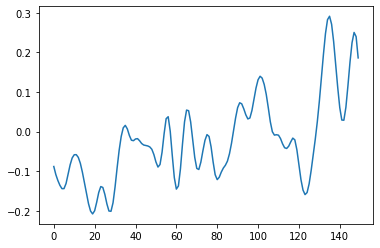

In [106]:
#all tirals

plt.plot(np.mean(snips, axis=0))


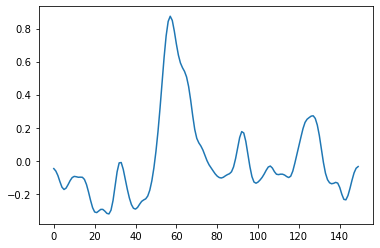

In [107]:
#fist lick

plt.plot(np.mean(snips_lick, axis=0))

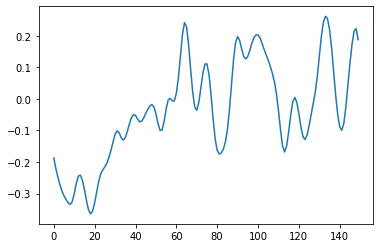

In [108]:
# hit trials

plt.plot(np.mean(snips_hit, axis=0))

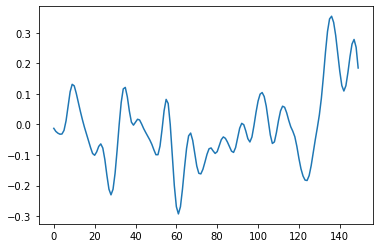

In [109]:
# missed trials
plt.plot(np.mean(snips_miss, axis=0))

In [110]:
# f,ax=plt.subplots (figsize=(9,6), ncols=2, nrows=2, sharey=False)
# f.subplots_adjust(wspace=0.2, hspace=0.5,bottom=0.15, left=0.3)

# tp.shadedError(snips,
#                ax=ax[0][0])

# tp.shadedError(snips_hit, 
#               ax=ax[0][1])

# tp.shadedError(snips_miss,
#               ax=ax[1][0])

# tp.shadedError(snips_lick,
#               ax=ax[1][1])

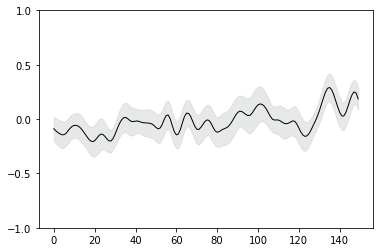

In [111]:
#all trials
f, ax = plt.subplots()
tp.shadedError(ax, snips)
ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
# f.savefig('PR_all_malt.pdf')

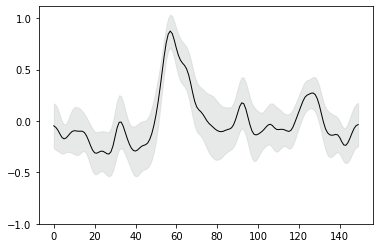

In [112]:
# licks trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_lick)
ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
# f.savefig('PR_hit_malt.pdf')

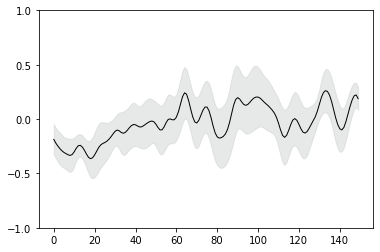

In [113]:
# hit trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_hit)
ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
# f.savefig('PR_hit_malt.pdf')

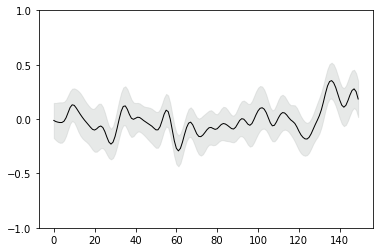

In [114]:
# miss trials
f, ax = plt.subplots()
tp.shadedError(ax, snips_miss)

ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])

# f.savefig('PR_miss_malt.pdf')

In [115]:
# tp.makeheatmap?

In [116]:
cell_idx = [idx for idx,vals in enumerate(iscell) if vals[0]==1]

In [117]:
len(cell_idx)

77

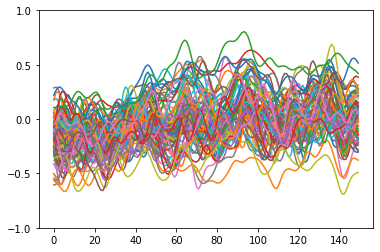

In [118]:
def filter_cell(x):

    t = np.arange(0,len(x)/10,0.1)
    filt = signal.butter(4, 1, 'low', fs=10, output='sos')
    filtered = signal.sosfilt(filt, x)
    
    return filtered
    

f, ax =plt.subplots()

avg_pump = np.zeros((len(cell_idx), 150))
avg_hit = np.zeros((len(cell_idx), 150))
avg_miss = np.zeros((len(cell_idx), 150))
for i, cell in enumerate(cell_idx):
    x = raw_F[cell, :] - 0.7*(neu_F[cell, :])
    x = raw_F[cell, :]
    x = (x - np.mean(x))/np.std(x)
    x = filter_cell(x)
    
    snips = []
    for p in pump_frames:
        snips.append(x[p-50:p+100])
    
    
    hit=[]
    miss=[]
    for p in pump_frames: 
        temp=[]
        for lick in licks_frames: 
            if lick > p and lick < p + 100:
                temp.append(lick)
        if len(temp) > 0: 
            hit.append(p)
        if len(temp) == 0: 
            miss.append(p)
            
    snips_hit=[]
    for p in hit: 
        snips_hit.append(x[p-50:p+100])
    
    
    avg = np.mean(snips, axis=0)
    
    avg_h = np.mean(snips_hit, axis=0)
    
    ax.plot(avg_h)
    ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
    avg_pump[i,:] = avg
    avg_hit[i,:] =avg_h


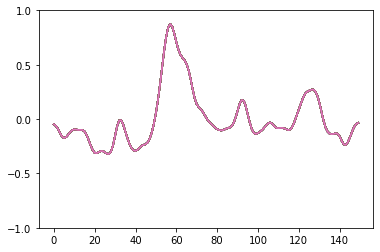

In [125]:
#Licks trial 

def filter_cell(x):

    t = np.arange(0,len(x)/10,0.1)
    filt = signal.butter(4, 1, 'low', fs=10, output='sos')
    filtered = signal.sosfilt(filt, x)
    
    return filtered
    

f, ax =plt.subplots()

avg_pump = np.zeros((len(cell_idx), 150))
avg_hit = np.zeros((len(cell_idx), 150))
avg_miss = np.zeros((len(cell_idx), 150))
avg_lick = np.zeros((len(cell_idx), 150))
for i, cell in enumerate(cell_idx):
    x = raw_F[cell, :] - 0.7*(neu_F[cell, :])
    x = raw_F[cell, :]
    x = (x - np.mean(x))/np.std(x)
    x = filter_cell(x)
    
    snips = []
    for p in pump_frames:
        snips.append(x[p-50:p+100])
    
    
    hit=[]
    miss=[]
    for p in pump_frames: 
        temp=[]
        for lick in licks_frames: 
            if lick > p and lick < p + 100:
                temp.append(lick)
        if len(temp) > 0: 
            hit.append(p) # list of frame number of pump on in trials WITH liskc
        if len(temp) == 0: 
            miss.append(p)
        
        licks.append(temp) # to get list of licks in each trial 
        
        
    temp_l=[]
    for trial in licks: 
        if len(trial) > 0: 
            temp_l.append(trial[:1])     # Makes a list of lists (frame number of first lick in hit trials)
        
    #List comprehension to convert list of lists to flat list 
    first_lick=[trial for sublist in temp_l for trial in sublist]  
            
    snips_hit=[]
    for p in hit: 
        snips_hit.append(x[p-50:p+100])
        
    snips_lick=[]
    for p in first_lick:
        snips_lick.append(filtered[p-50:p+100])
    
    avg = np.mean(snips, axis=0)
    
    avg_h = np.mean(snips_hit, axis=0)
    
    avg_l = np.mean (snips_lick, axis=0)
    
    ax.plot(avg_l)
    ax.set_yticks([-1.0,-0.5, 0,  0.5, 1.0])
    avg_pump[i,:] = avg
    avg_hit[i,:] =avg_h
    avg_lick[i,:] =avg_l


In [126]:
maxsignal=[np.max(signal[50:100]) for signal in avg_hit]

In [127]:
def make_heatmap(data, events=None, ax=None, cmap="jet", sort=True, ylabel="Trials"):

    if ax == None:
        f, ax = plt.subplots()

    (ntrials, bins) = np.shape(data)
    
    print(ntrials, bins)
    

    xvals = np.linspace(-5,10,bins)
    yvals = np.arange(0, ntrials)
    xx, yy = np.meshgrid(xvals, yvals)

    if sort == True:
        try:
            inds = np.argsort(events)
            data = [data[i] for i in inds]
            events = [events[i] for i in inds]
        except:
            print("Events cannot be sorted")

    mesh = ax.pcolormesh(xx, yy, data, cmap=cmap, shading="auto")

#     if events:
#         ax.vlines(events, yvals-0.5, yvals+0.5, color='w')

#     ax.set_ylabel(ylabel, rotation=90, labelpad=2)

#     ax.invert_yaxis()
#     ax.set_yticks([])
#     ax.set_xticks([])
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)

    return ax, mesh

77 150


(<AxesSubplot:>, <matplotlib.collections.QuadMesh at 0x23f29117700>)

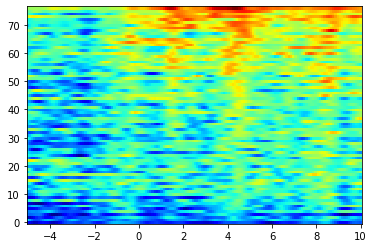

In [129]:
f, ax = plt.subplots()
make_heatmap(avg_hit,events=maxsignal, ax=ax)

In [123]:
np.shape(avg_hit)

(77, 150)

In [ ]:
dir(tp)